## Convert all .tif files in a folder to image files (png/jpg)

In [12]:
import glob

from pprint import pprint

import rasterio
import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure


from skimage.io import imsave, imread

In [18]:
# define parameters
output_path = '../../data/img_files_test/'

# define paths with raster data
rasters_file_path = '../../data/data_jim/**/*.tif'

# image specifics:
band_list = [3,2,1]
file_type = 'jpg' # jpg or png
upper_percentile = 98
lower_percentile = 2
no_data_value = -999

# misc
plot_results = True

In [19]:
# find files in raster folder
raster_files = glob.glob(rasters_file_path)

In [20]:
# check if the right files are selected
print(len(raster_files))
pprint(raster_files[0:2])

9
['../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_024_224_modified.tif',
 '../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_029_224_modified.tif']


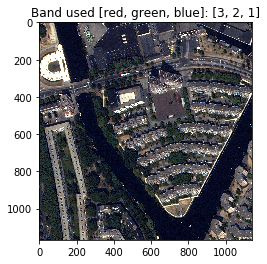

--------------------------------------------
original file: 
 ../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_024_224_modified.tif
--------------------------------------------
file written to: 
 ../../data/img_files_test/example_Amsterdam_2018-07-26_10_57_10400100407D9200_nr_024_224_modified.jpg
--------------------------------------------


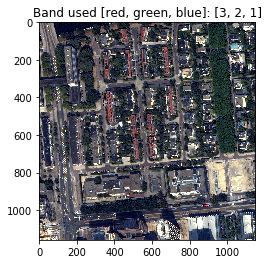

--------------------------------------------
original file: 
 ../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_029_224_modified.tif
--------------------------------------------
file written to: 
 ../../data/img_files_test/example_Amsterdam_2018-07-26_10_57_10400100407D9200_nr_029_224_modified.jpg
--------------------------------------------


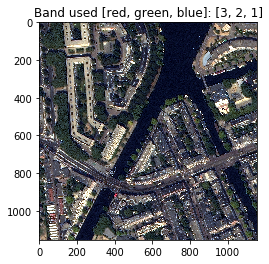

--------------------------------------------
original file: 
 ../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_023_224_modified.tif
--------------------------------------------
file written to: 
 ../../data/img_files_test/example_Amsterdam_2018-07-26_10_57_10400100407D9200_nr_023_224_modified.jpg
--------------------------------------------


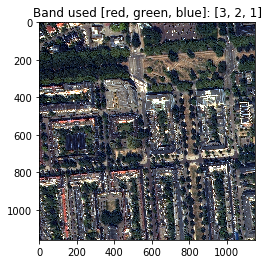

--------------------------------------------
original file: 
 ../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_031_224_modified.tif
--------------------------------------------
file written to: 
 ../../data/img_files_test/example_Amsterdam_2018-07-26_10_57_10400100407D9200_nr_031_224_modified.jpg
--------------------------------------------


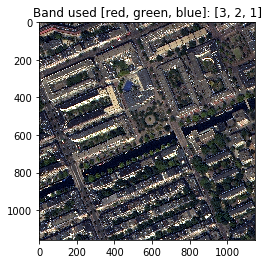

--------------------------------------------
original file: 
 ../../data/data_jim/drive-download-20200412T192845Z-001/Amsterdam_2018-07-26_10_57_10400100407D9200_nr_021_224_modified.tif
--------------------------------------------
file written to: 
 ../../data/img_files_test/example_Amsterdam_2018-07-26_10_57_10400100407D9200_nr_021_224_modified.jpg
--------------------------------------------


In [22]:
# loop over all files and write them to output folder
for raster_file in raster_files[0:5]:


    dataset = rasterio.open(raster_file)
    
    # read and reformat raster data
    img = dataset.read()
    img_plot_raw = img[band_list,:,:]
    img_plot = np.rot90(np.fliplr(img_plot_raw.T))
    
    # correct exposure for each band individually
    img_plot_enhance = np.array(img_plot, copy=True)
    
    for band in range(3):
        img_plot[img_plot == no_data_value] = np.nan 
        p_1, p_2 = np.nanpercentile(img_plot[:,:,band], (lower_percentile, upper_percentile))
        img_plot_enhance[:,:,band] = exposure.rescale_intensity(img_plot[:,:,band], 
                                                            in_range=(p_1, p_2), 
                                                            out_range = 'uint8')  
  

    
    # name string 
    orig_file_name = raster_file.split('/')[-1].split('.')[0]
    
    # write jpg file
    file_path_jpg = '{0}example_{1}.{2}'.format(output_path,orig_file_name, file_type)
    file_name_jpg = 'example_{0}.{1}'.format(orig_file_name, file_type)
    imsave(file_path_jpg, img_plot_enhance.astype('uint8'))
    
    
    if plot_results:
        plt.imshow(img_plot_enhance.astype(int))
        plt.title('Band used [red, green, blue]: {}'.format(band_list))
        plt.show()
        
        print('--------------------------------------------')
        print('original file: \n', raster_file)
        print('--------------------------------------------')
        print('file written to: \n', file_path_jpg)
        print('--------------------------------------------')